# IBTrACS Dataset Getting Started
The following is a description of the dataset from the NOAA website:
> The International Best Track Archive for Climate Stewardship (IBTrACS) project is the most complete global collection of tropical cyclones available. It merges recent and historical tropical cyclone data from multiple agencies to create a unified, publicly available, best-track dataset that improves inter-agency comparisons. IBTrACS was developed collaboratively with all the World Meteorological Organization (WMO) Regional Specialized Meteorological Centres, as well as other organizations and individuals from around the world.  

More info about the dataset can be found on the [projects home page](https://www.ncei.noaa.gov/products/international-best-track-archive).

To get started with the ibtracs dataset, we call its associated function within the `datasets` module. This function downloads the dataset and transforms it into a ragged array data structure which is useful for Lagrangian analysis. For more information on the data structure, visit the [Clouddrift homepage](https://clouddrift.org/).

While we can utilize the adapters `to_raggedarray` function directly, leveraging the functions within the `datasets` module has the added benefit of caching the generated ragged array so that the process only needs to be performed once.

Below we will leverage the ibtracs associated `datasets` module function and display the datasets coordinates, data variables and dimensions.

In [1]:
import clouddrift as cd

ds = cd.datasets.ibtracs("v04r01", "LAST_3_YEARS", "/home/ksantana/.clouddrift/tmp")
ds

https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/netcdf/IBTrACS.last3years.v04r01.nc: 100%|██████████| 1.28k/1.28k [00:00<00:00, 2.01MB/s]
Filling the Ragged Array: 100%|██████████████| 292/292 [00:01<00:00, 150.53it/s]


<xarray.Dataset> Size: 14MB
Dimensions:           (storm: 292, obs: 17028, quadrant: 4)
Coordinates:
    id                (storm) int64 2kB ...
    time              (obs) datetime64[ns] 136kB ...
Dimensions without coordinates: storm, obs, quadrant
Data variables: (12/161)
    numobs            (storm) int64 2kB ...
    sid               (storm) |S13 4kB ...
    season            (storm) float32 1kB ...
    number            (storm) int16 584B ...
    name              (storm) |S128 37kB ...
    source_usa        (storm) |S128 37kB ...
    ...                ...
    usa_seahgt        (obs) float32 68kB ...
    usa_searad        (obs, quadrant) float32 272kB ...
    storm_speed       (obs) float32 68kB ...
    storm_dir         (obs) float32 68kB ...
    lat               (obs) float32 68kB ...
    lon               (obs) float32 68kB ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Sun Jan  5 05:42:18 2025: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...

If we inspect the dataset above we see 3 dimensions, `storm, obs and, quadrant`. The `storm` dimension is utilized in identifying observations for the same entity and is typically named `row`. The reason for the difference in name is to follow the naming conventions utilized in the dataset. Because this doesn't match up with the label the library expects we must provide this name to the various analysis functions provided by the library, like the `subset` function.

Likewise another important variable utilized by the analysis functions is the `rowsize` variable or `numobs` as utilized by this dataset. Similarly to the `row` dimension name, because this dimension doesn't follow the standard name it must also be provided to the analysis functions to work correctly.

Lets start out by performing a common step in scientific analysis where we select a subset of the dataset. Well select all observation within the year 2024 and then work on plotting the results. Below you will be able to see that in the `subset` function we provide the variable aliases for the `row` and the `rowsize` variables. Without this, the function will not work properly and will likely result in errors/exceptions being thrown.

In [2]:
import numpy as np

# Select the data for the year 2024 only by using the ragged.subset method
year = 2024
ds = cd.ragged.subset(
    ds,
    {"time": (np.datetime64(f"{year}-01-01"), np.datetime64(f"{year}-12-31"))},
    row_dim_name="storm",
    rowsize_var_name="numobs"
)
ds

<xarray.Dataset> Size: 4MB
Dimensions:           (storm: 93, obs: 4780, quadrant: 4)
Coordinates:
    id                (storm) int64 744B 199 200 201 202 203 ... 288 289 290 291
    time              (obs) datetime64[ns] 38kB 2024-01-01T00:00:00.000039936...
Dimensions without coordinates: storm, obs, quadrant
Data variables: (12/161)
    numobs            (storm) int64 744B 29 153 57 155 25 21 ... 35 47 27 32 9
    sid               (storm) |S13 1kB ...
    season            (storm) float32 372B ...
    number            (storm) int16 186B ...
    name              (storm) |S128 12kB ...
    source_usa        (storm) |S128 12kB ...
    ...                ...
    usa_seahgt        (obs) float32 19kB ...
    usa_searad        (obs, quadrant) float32 76kB ...
    storm_speed       (obs) float32 19kB ...
    storm_dir         (obs) float32 19kB ...
    lat               (obs) float32 19kB ...
    lon               (obs) float32 19kB ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Sun Jan  5 05:42:18 2025: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 5.0.7 (Homepage = ht...

Now that we have selected a subset of the data were interested in, lets go ahead and plot it!

Notice how we provide the `numobs` variable where we would typically pass the `rowsize` variable. This happens because `numobs` is simply another name for the `rowsize` variable that defines the number of observations or `obs` made for a specific `row`/`storm`.

c:\anaconda\envs\ibtracs-get-started\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


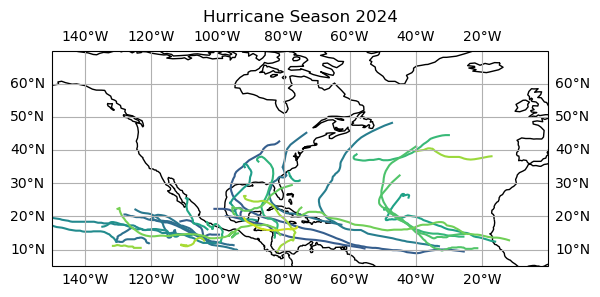

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# make figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
hl = cd.plotting.plot_ragged(
    ax,
    ds.lon,
    ds.lat,
    ds.numobs,
    transform=ccrs.PlateCarree(),
)
ax.set_extent([-150, 0, 5, 70], crs=ccrs.PlateCarree())
ax.set_title(f"Hurricane Season {year}")
ax.coastlines()
ax.gridlines(draw_labels=True)

Now that we've plotted a simple subset of the dataset, let's do something a bit more interesting like coloring the paths by each observations `wind_speed`.

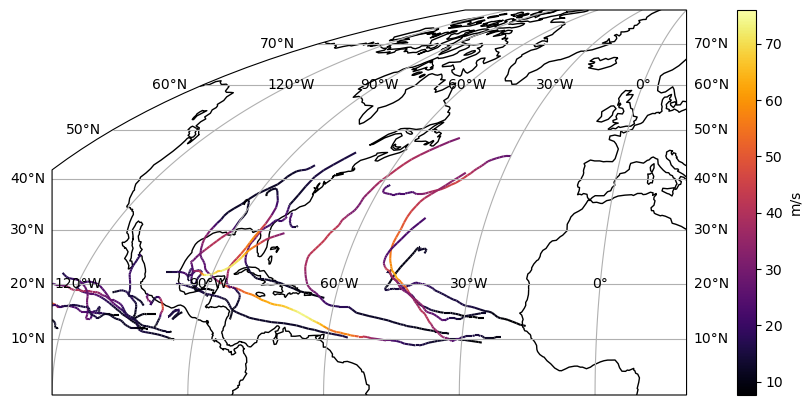

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


_METERS_IN_NAUTICAL_MILES = 1825

# Create the visualization
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=30))
hl = cd.plotting.plot_ragged(
    ax,
    ds.lon,
    ds.lat,
    ds.numobs,
    colors=ds.usa_wind.values * _METERS_IN_NAUTICAL_MILES / 3600,
    transform=ccrs.PlateCarree(),
    cmap="inferno",
)
ax.set_extent([-120, 0, 0, 80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size="3%", pad=0.5, axes_class=plt.Axes)
fig.colorbar(hl, cax=cax, label="m/s")

Now we can see each storms wind_speed throughout its trajectory. The examples above showcases a small but powerful sample of functionality that can be achieved by leveraging the library.

For more analysis/processing functions you can checkout our [API documentation](https://clouddrift.org/api.html) to see what other tools are available for working with ragged array structured datasets.